In [1]:
import sys
sys.path.append("..")

import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

from models import MarkowitzMinVarianceModel, SharpeRatioMaxModel

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn') # style.use('ggplot') # style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# TOPIX Index
df_tpx = pd.read_csv("../data/tse_topix_20040331-20201031.csv")
df_tpx = df_tpx.set_index("Date")

# TOPIX Core30 
df_tpx30 = pd.read_csv("../data/tse_topixcore30_20001031-202010131.csv")
df_tpx30 = df_tpx30.set_index('Date')

# TOPIX 500
df_tpx500 = pd.read_csv("../data/tse_topix500_20001031-202010131.csv")
df_tpx500 = df_tpx500.set_index('Date')

### TOPIX INDEX

2004/03/31 - 2020/10/31

In [3]:
# TOPIX Index
df_tpx = pd.read_csv("../data/tse_topix_20040331-20201031.csv")
df_tpx = df_tpx.set_index("Date")

df = df_tpx
df_retchg = df.pct_change()

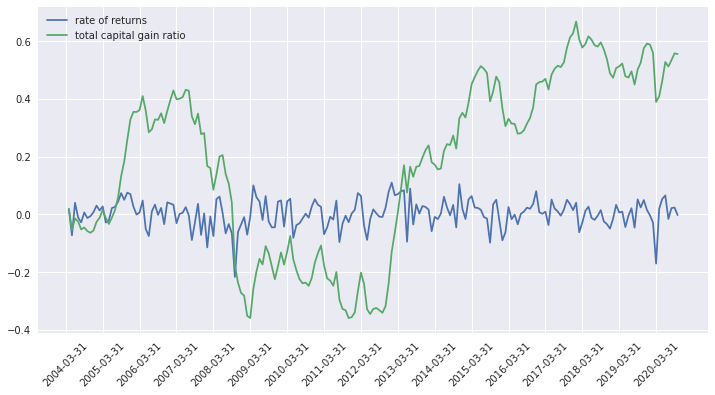

In [4]:
plt.figure(figsize=(12,6))
for idx, col in enumerate(df.columns):
    plt.plot(df_retchg.index.values, df_retchg[col].values, label="rate of returns")
    plt.plot(df_retchg.index.values, df_retchg[col].cumsum().values, label="total capital gain ratio")
plt.legend(loc="upper left")
plt.xticks([d for idx, d in enumerate(df.index) if idx % 12 == 0])
plt.xticks(rotation=45)
plt.show()

### TOPIX Core30

2000/10/31 - 2020/10/31

In [5]:
df_tpx30 = pd.read_csv("../data/tse_topixcore30_20001031-202010131.csv")
df_tpx30 = df_tpx30.set_index('Date')

df = df_tpx30

"""
# cut
st = datetime(2020,6,30).strftime('%Y-%m-%d')
ed = datetime(2020,10,31).strftime('%Y-%m-%d')
df_tpx30[st:ed]
"""

"\n# cut\nst = datetime(2020,6,30).strftime('%Y-%m-%d')\ned = datetime(2020,10,31).strftime('%Y-%m-%d')\ndf_tpx30[st:ed]\n"

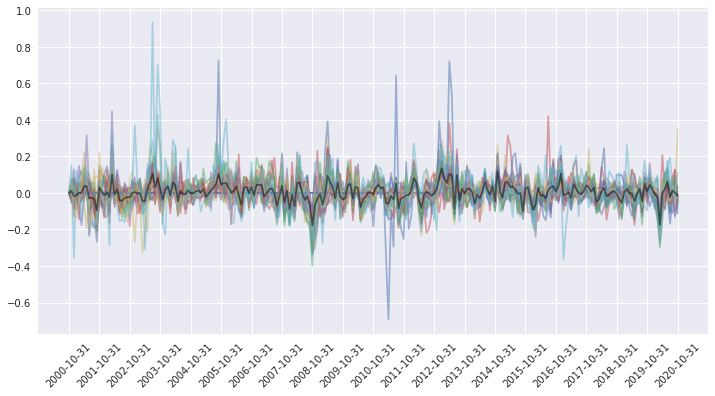

In [6]:
df_retchg = df.pct_change()
df_retchg[:1] = 0.0 # set 0.0 to the first record

plt.figure(figsize=(12, 6))
for idx, col in enumerate(df.columns):
    plt.plot(df_retchg.index, df_retchg[col], label=col, alpha=0.5)
plt.plot(df_retchg.index, df_retchg.mean(axis='columns'), label="topix30 mean", color="black", alpha=0.5)
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks([d for idx, d in enumerate(df.index) if idx % 12 == 0])
plt.xticks(rotation=45)
plt.show()

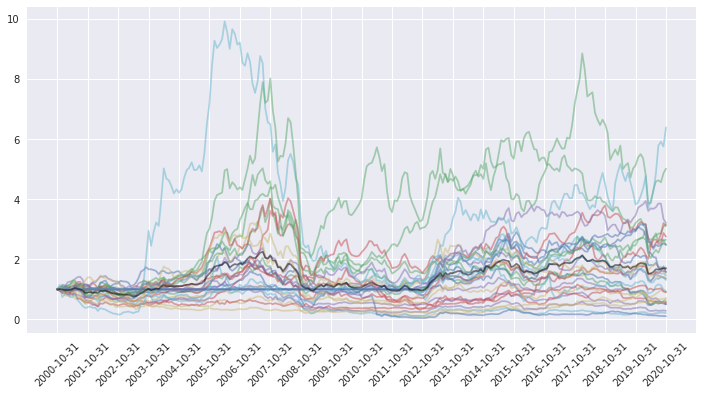

In [7]:
df_retcum = (1.0 + df_retchg).cumprod()
df_retcum[:1] = 1.0 # set 1.0 to the first record

plt.figure(figsize=(12, 6))
for idx, col in enumerate(df.columns):
    plt.plot(df_retcum.index, df_retcum[col], label=col, alpha=0.5)
plt.plot(df_retcum.index, df_retcum.mean(axis='columns'), label="topix30 mean", color="black", alpha=0.5)
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks([d for idx, d in enumerate(df.index) if idx % 12 == 0])
plt.xticks(rotation=45)
plt.show()

### TOPIX 500

2000/10/31 - 2020/10/31

In [8]:
df_tpx500 = pd.read_csv("../data/tse_topix500_20001031-202010131.csv")
df_tpx500 = df_tpx500.set_index('Date')

df = df_tpx500

"""
# cut
st = datetime(2020,6,30).strftime('%Y-%m-%d')
ed = datetime(2020,10,31).strftime('%Y-%m-%d')
df_tpx500[st:ed]
"""

"\n# cut\nst = datetime(2020,6,30).strftime('%Y-%m-%d')\ned = datetime(2020,10,31).strftime('%Y-%m-%d')\ndf_tpx500[st:ed]\n"

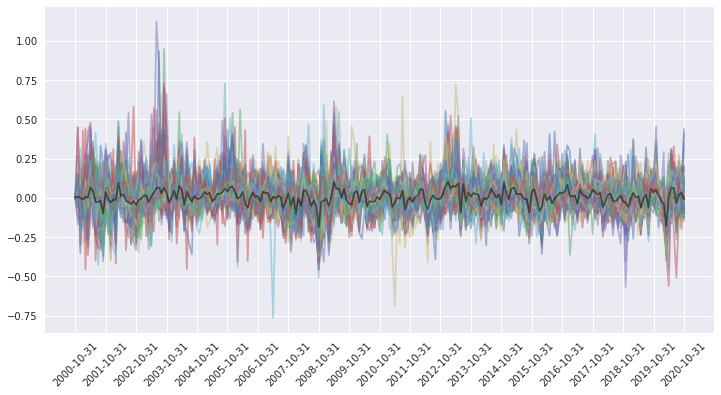

In [9]:
df_retchg = df.pct_change()
df_retchg[:1] = 0.0 # set 0.0 to the first record

plt.figure(figsize=(12, 6))
for idx, col in enumerate(df.columns):
    plt.plot(df_retchg.index, df_retchg[col], label=col, alpha=0.5)
plt.plot(df_retchg.index, df_retchg.mean(axis='columns'), label="topix30 mean", color="black", alpha=0.5)
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks([d for idx, d in enumerate(df.index) if idx % 12 == 0])
plt.xticks(rotation=45)
plt.show()

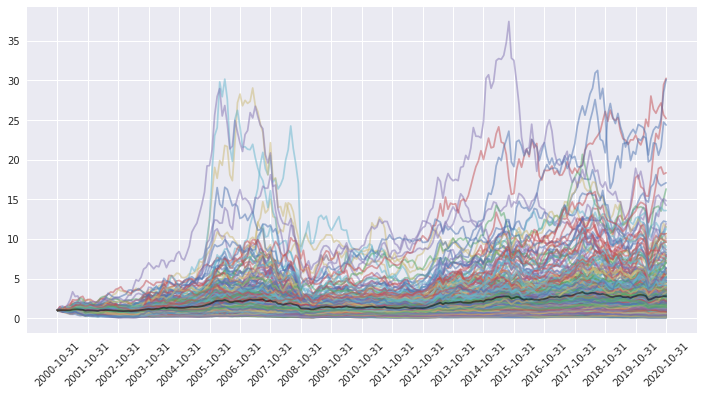

In [10]:
df_retcum = (1.0 + df_retchg).cumprod()
df_retcum[:1] = 1.0 # set 1.0 to the first record

plt.figure(figsize=(12, 6))
for idx, col in enumerate(df.columns):
    plt.plot(df_retcum.index, df_retcum[col], label=col, alpha=0.5)
plt.plot(df_retcum.index, df_retcum.mean(axis='columns'), label="topix30 mean", color="black", alpha=0.5)
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks([d for idx, d in enumerate(df.index) if idx % 12 == 0])
plt.xticks(rotation=45)
plt.show()

# back-test

In [3]:
# Investment period
ST_BACKTEST = datetime(2011,10,31)
ED_BACKTEST = datetime(2020,10,31)

# Risk-free rate (10Year-JGB, monthly interest)
jgb_int = 0.0001 # 0.01% per year (Japanese Government Bond)
r_f = jgb_int * (1/12) # adjust monthly
r_e = r_f

# TOPIX Index
df_tpx = df_tpx.pct_change()
df_tpx[:1] = 0.0 # set 0.0 to the first record

#### MarkowitzMinVarianceModel

tpx core30, window_size=36, r_e=TOPIX INDEX

Portfolio Performance
Returns per month
  sharpe ratio     : 0.17899799
  mean of returns  : 0.00705534
  std of returns   : 0.03936920
    risk-free rate : 0.00000833
    capgain ratio  : 0.97993744
Returns per year
  sharpe ratio     : 0.62006721
  mean of returns  : 0.08466408
  std of returns   : 0.13637890


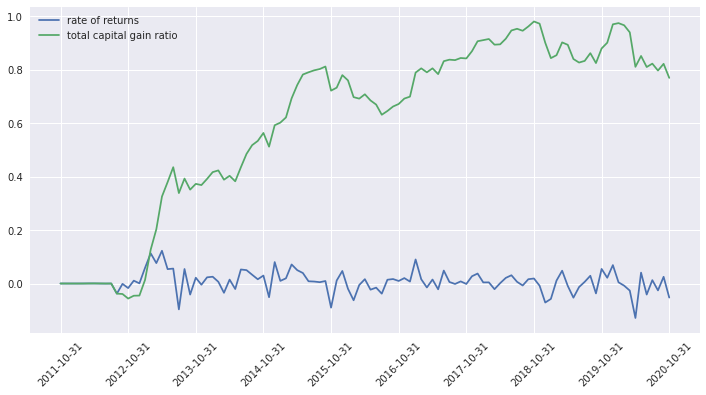

In [4]:
# Model Params
params = {
    "window_size": 36,
    "rebalance_freq": 1,
    "r_e": df_tpx,
    "r_f": r_f
}

# Data
st = (ST_BACKTEST - relativedelta(months=params["window_size"])).strftime('%Y-%m-%d')
ed = ED_BACKTEST.strftime('%Y-%m-%d')
df = df_tpx30[st:ed]

# Model (mmvp)
model = MarkowitzMinVarianceModel(df, **params)
df_bt = model.backtest()
model.evaluate_backtest(logging=True)
model.plot_returns()
del model

#### MarkowitzMinVarianceModel

data=tpx core30, window_size=60, r_e=TOPIX INDEX

Portfolio Performance
Returns per month
  sharpe ratio     : 0.17816423
  mean of returns  : 0.00711620
  std of returns   : 0.03989501
    risk-free rate : 0.00000833
    capgain ratio  : 0.98808245
Returns per year
  sharpe ratio     : 0.61717900
  mean of returns  : 0.08539436
  std of returns   : 0.13820035


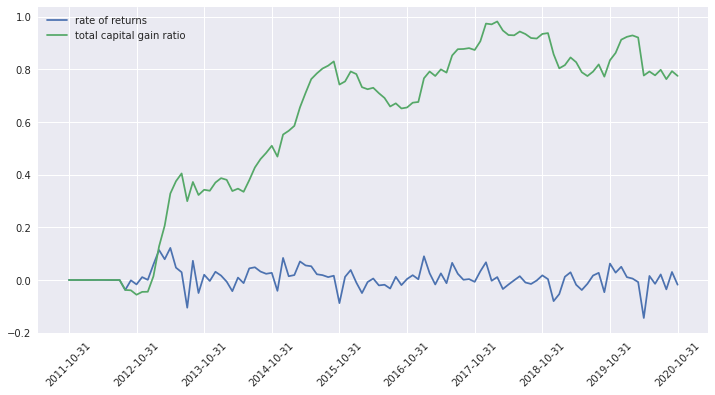

In [5]:
# Model Params
params = {
    "window_size": 60,
    "rebalance_freq": 1,
    "r_e": df_tpx,
    "r_f": r_f
}

# Data
st = (ST_BACKTEST - relativedelta(months=params["window_size"])).strftime('%Y-%m-%d')
ed = ED_BACKTEST.strftime('%Y-%m-%d')
df = df_tpx30[st:ed]

# Model (mmvp)
model = MarkowitzMinVarianceModel(df, **params)
df_bt = model.backtest()
model.evaluate_backtest(logging=True)
model.plot_returns()
del model

#### MarkowitzMinVarianceModel

data=tpx 500, window_size=36, r_e=0.005

Portfolio Performance
Returns per month
  sharpe ratio     : 0.17901577
  mean of returns  : 0.00217776
  std of returns   : 0.01211865
    risk-free rate : 0.00000833
    capgain ratio  : 0.25773053
Returns per year
  sharpe ratio     : 0.62012881
  mean of returns  : 0.02613315
  std of returns   : 0.04198023


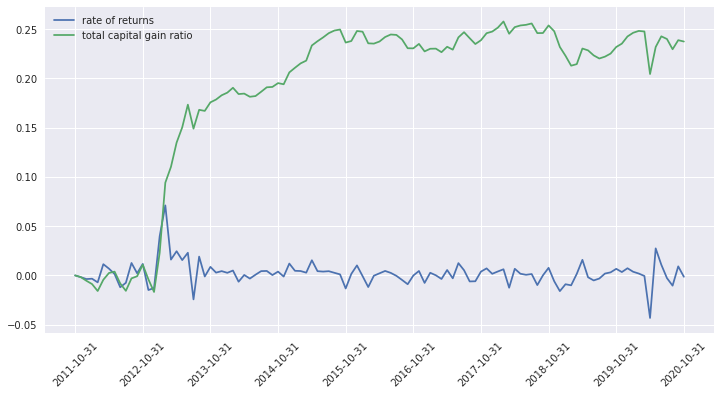

In [6]:
# Model Params
params = {
    "window_size": 36,
    "rebalance_freq": 1,
    "r_e": 0.005,
    "r_f": r_f
}

# Data
st = (ST_BACKTEST - relativedelta(months=params["window_size"])).strftime('%Y-%m-%d')
ed = ED_BACKTEST.strftime('%Y-%m-%d')
df = df_tpx500[st:ed]

# Model (mmvp)
model = MarkowitzMinVarianceModel(df, **params)
df_bt = model.backtest()
model.evaluate_backtest(logging=True)
model.plot_returns()
del model

#### SharpeRatioMaxModel

data=tpx core30, window_size=36

Portfolio Performance
Returns per month
  sharpe ratio     : 0.21173144
  mean of returns  : 0.01037744
  std of returns   : 0.04897293
    risk-free rate : 0.00000833
    capgain ratio  : 1.71027698
Returns per year
  sharpe ratio     : 0.73345924
  mean of returns  : 0.12452931
  std of returns   : 0.16964721


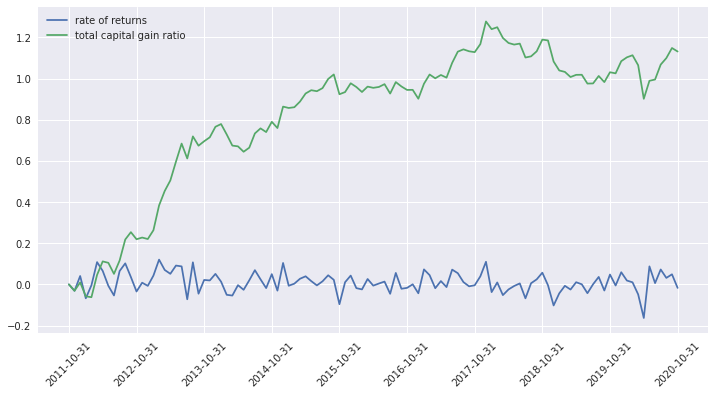

In [7]:
# Model Params
params = {
    "window_size": 36,
    "rebalance_freq": 1,
    "r_f": r_f
}

# Data
st = (ST_BACKTEST - relativedelta(months=params["window_size"])).strftime('%Y-%m-%d')
ed = ED_BACKTEST.strftime('%Y-%m-%d')
df = df_tpx30[st:ed]

# Model (mmvp)
model = SharpeRatioMaxModel(df, **params)
df_bt = model.backtest()
model.evaluate_backtest(logging=True)
model.plot_returns()
del model

#### SharpeRatioMaxModel

data=tpx 500, window_size=36

Portfolio Performance
Returns per month
  sharpe ratio     : 0.18904334
  mean of returns  : 0.00786332
  std of returns   : 0.04155126
    risk-free rate : 0.00000833
    capgain ratio  : 1.14066077
Returns per year
  sharpe ratio     : 0.65486534
  mean of returns  : 0.09435986
  std of returns   : 0.14393778


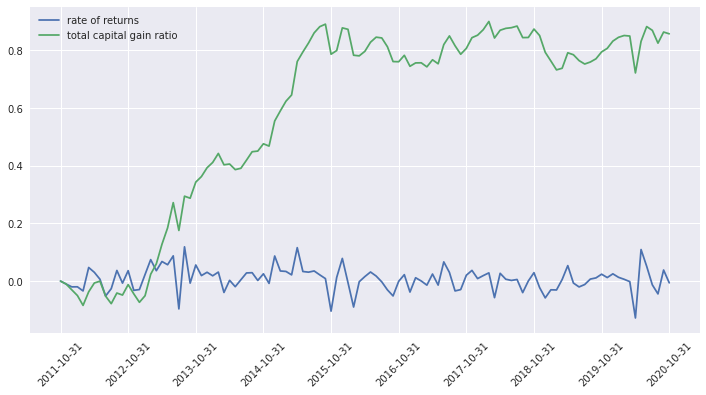

In [8]:
# Model Params
params = {
    "window_size": 36,
    "rebalance_freq": 1,
    "r_f": r_f
}

# Data
st = (ST_BACKTEST - relativedelta(months=params["window_size"])).strftime('%Y-%m-%d')
ed = ED_BACKTEST.strftime('%Y-%m-%d')
df = df_tpx500[st:ed]

# Model (mmvp)
model = SharpeRatioMaxModel(df, **params)
df_bt = model.backtest()
model.evaluate_backtest(logging=True)
model.plot_returns()
del model